# Klasifikacija

Za početak ćemo dodati biblioteke za rad sa podacima i učitati sređeni skup podataka.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns=30
np.option

In [2]:
banks=pd.read_csv('Bank Marketing/prepared_bank.csv')

In [3]:
banks.head(10)

,age,job,education,housing,loan,winter,spring,summer,autumn,cellular,telephone,anxiety,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,nr_employed,euribor3m,divorced,married,single,subscribed?
0,30,0,2,True,False,0,1,0,0,1,0,4,487.000000,2.0,False,False,-1.8,92.893,-46.2,5099.1,1.313,0,1,0,False
1,39,1,3,False,False,0,1,0,0,0,1,4,346.000000,4.0,False,False,1.1,93.994,-36.4,5191.0,4.855,0,0,1,False
2,25,1,3,True,False,0,0,1,0,0,1,2,227.000000,1.0,False,False,1.4,94.465,-41.8,5228.1,4.962,0,1,0,False
3,47,2,5,True,False,1,0,0,0,1,0,0,58.000000,1.0,False,False,-0.1,93.200,-42.0,5195.8,4.191,0,1,0,False
4,32,1,5,False,False,0,0,0,1,1,0,3,128.000000,3.0,False,True,-1.1,94.199,-37.5,4963.6,0.884,0,0,1,False
5,32,2,5,True,False,0,0,0,1,1,0,0,290.000000,4.0,False,False,-1.1,94.199,-37.5,4963.6,0.879,0,0,1,False
6,41,2,5,True,False,1,0,0,0,1,0,0,44.000000,2.0,False,False,-0.1,93.200,-42.0,5195.8,4.191,0,1,0,False
7,31,1,4,False,False,1,0,0,0,1,0,1,68.000000,1.0,False,True,-0.1,93.200,-42.0,5195.8,4.153,1,0,0,False
8,35,0,2,False,False,0,1,0,0,0,1,3,256.974477,1.0,False,False,1.1,93.994,-36.4,5191.0,4.855,0,1,0,False
9,25,1,1,True,False,0,0,1,0,1,0,3,301.000000,1.0,False,False,1.4,93.918,-42.7,5228.1,4.958,0,0,1,False


In [4]:
banks.dtypes

age                 int64
job                 int64
education           int64
housing              bool
loan                 bool
winter              int64
spring              int64
summer              int64
autumn              int64
cellular            int64
telephone           int64
anxiety             int64
duration          float64
campaign          float64
pdays                bool
previous             bool
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
nr_employed       float64
euribor3m         float64
divorced            int64
married             int64
single              int64
subscribed?          bool
dtype: object

In [5]:
banks=banks.dropna()

Nakon dorade podataka vreme je da podelimo skup u dva dela, ulazne podatke (X) i izlazne podatke (y).

In [6]:
X=banks.drop('subscribed?', axis=1)
y=banks['subscribed?']

In [7]:
y.head()

0    False
1    False
2    False
3    False
4    False
Name: subscribed?, dtype: bool

In [8]:
X.head()

,age,job,education,housing,loan,winter,spring,summer,autumn,cellular,telephone,anxiety,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,nr_employed,euribor3m,divorced,married,single
0,30,0,2,True,False,0,1,0,0,1,0,4,487.0,2.0,False,False,-1.8,92.893,-46.2,5099.1,1.313,0,1,0
1,39,1,3,False,False,0,1,0,0,0,1,4,346.0,4.0,False,False,1.1,93.994,-36.4,5191.0,4.855,0,0,1
2,25,1,3,True,False,0,0,1,0,0,1,2,227.0,1.0,False,False,1.4,94.465,-41.8,5228.1,4.962,0,1,0
3,47,2,5,True,False,1,0,0,0,1,0,0,58.0,1.0,False,False,-0.1,93.200,-42.0,5195.8,4.191,0,1,0
4,32,1,5,False,False,0,0,0,1,1,0,3,128.0,3.0,False,True,-1.1,94.199,-37.5,4963.6,0.884,0,0,1


Pre nego što počnemo sa pojedinačnim algoritmima, dodaćemo metrike performansa, matricu konfuzije i definišemo funckiju za prikaz dobijenih vrednosti. Takođe ćemo da izvršimo proveru tačnosti večinskog izbora, tj. ukoliko svaki atrbiut proglasimo za False, koliko ćemo procentualno biti u pravu. Dobili smo visok procenat 89.1%, što može da implicira da tačnost klasifikacije možda nije najbolja mera za evaulaciju.

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, ConfusionMatrixDisplay
def print_performance(y, y_hat):
    print(f'Accuracy: {accuracy_score(y, y_hat)}')
    print(f'Precision: {precision_score(y, y_hat)}')
    print(f'Recall: {recall_score(y, y_hat)}')
    print(f'F1: {f1_score(y, y_hat)}')
accuracy_score(y, np.repeat(0, len(y)))

0.8914525432616676

Sada ćemo proći kroz 4 osnovna algoritma, logističku regresiju, naivni Bayes, stablo odlučivanja i kNN klasifikaciju. Za svaki algoritam ćemo kreirati modele prvo nad celim skupom, zatim ćemo skup podeliti na train/test, zatim pomoću kros-valudacije, i na kraju ćemo da korigujemo parametre algoritma kako bismo pokušali da poboljšamo njegovu klasifikaciju.

## Logistička regresija

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

In [11]:
model.fit(X,y)

LogisticRegression(max_iter=1000)

In [12]:
print_performance(y, model.predict(X))

Accuracy: 0.9137388568432092
Precision: 0.6693227091633466
Recall: 0.4057971014492754
F1: 0.505263157894737


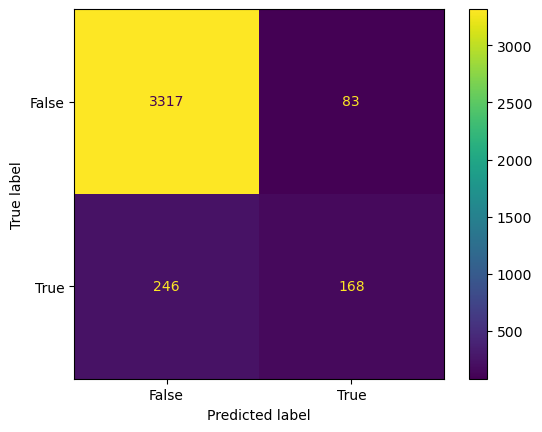

In [13]:
ConfusionMatrixDisplay(confusion_matrix(y, model.predict(X)), display_labels = [False, True]).plot()
plt.show()

Primenom logističke regresije na osnovnom skupu podataka smo doblili visok rezultat za tačnost klasifikacije (viša od većisnke klasifikacije), ali nam je zato odziv imao vrlo nisku vrednost. Prceiznost je donekle i prihvatljiva. Pošto moramo da definišemo koja nam je mera bitnija, u ovom slulaju ćemo najviše gledati odziv, pošto nam je skuplja greška ukoliko klasifikujemo osobu koja nije ostavila depozit kao osobu koja jeste, nego obrnuto.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1111)

In [15]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [16]:
print_performance(y_test, model.predict(X_test))

Accuracy: 0.9109170305676856
Precision: 0.6153846153846154
Recall: 0.4
F1: 0.4848484848484849


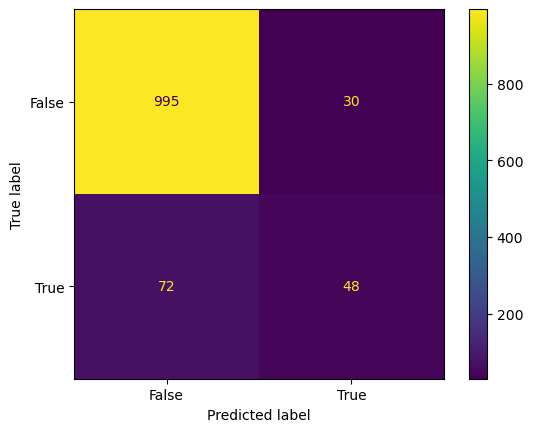

In [17]:
ConfusionMatrixDisplay(confusion_matrix(y_test, model.predict(X_test)), display_labels = [False, True]).plot()
plt.show()

Nakon podele skupa na test i train (train je 70%, test 30%) dobili smo malo lošije rezultate za svaku od metrika.

In [18]:
from sklearn.model_selection import cross_validate

In [19]:
model=LogisticRegression(max_iter=2000)

In [20]:
result=cross_validate(model, X, y, cv=10, scoring=['accuracy', 'precision', 'recall', 'f1'])

In [21]:
def print_cv_performance(result):
    print(f"Accuracy: {round(np.mean(result['test_accuracy'])*100, 2)}% +/- {round(np.std(result['test_accuracy'])*100, 2)}%")
    print(f"Precision: {round(np.mean(result['test_precision'])*100, 2)}% +/- {round(np.std(result['test_precision'])*100, 2)}%")
    print(f"Recall: {round(np.mean(result['test_recall'])*100, 2)}% +/- {round(np.std(result['test_recall'])*100, 2)}%")
    print(f"F1: {round(np.mean(result['test_f1'])*100, 2)}% +/- {round(np.std(result['test_f1'])*100, 2)}%")

In [22]:
print_cv_performance(result)

Accuracy: 91.24% +/- 0.54%
Precision: 66.26% +/- 5.18%
Recall: 40.31% +/- 7.56%
F1: 49.61% +/- 5.48%


Uvođenjem kros-validacije dobili smo da su prosečni rezultati vrlo slični početnom modelu, a takođe možemo da primetimo da postoji visok nivo variranja vrednosti kod odziva.

In [49]:
lr=[0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 1, 5]

In [53]:
for i in lr:
    print(f'Learning rate = {i}')
    model=LogisticRegression(max_iter=2000, C=i)
    result=cross_validate(model, X, y, cv=10, scoring=['accuracy', 'precision', 'recall', 'f1'])
    print_cv_performance(result)
    print('-------------------------------')

Learning rate = 0.001
Accuracy: 90.61% +/- 0.73%
Precision: 68.79% +/- 8.75%
Recall: 25.35% +/- 7.18%
F1: 36.45% +/- 8.13%
-------------------------------
Learning rate = 0.01
Accuracy: 91.09% +/- 1.06%
Precision: 68.38% +/- 9.14%
Recall: 34.03% +/- 8.67%
F1: 44.86% +/- 8.23%
-------------------------------
Learning rate = 0.05
Accuracy: 91.11% +/- 0.96%
Precision: 65.99% +/- 7.72%
Recall: 37.89% +/- 8.03%
F1: 47.71% +/- 7.21%
-------------------------------
Learning rate = 0.1
Accuracy: 91.14% +/- 0.77%
Precision: 65.9% +/- 6.67%
Recall: 38.84% +/- 8.22%
F1: 48.35% +/- 6.59%
-------------------------------
Learning rate = 0.2
Accuracy: 91.32% +/- 0.87%
Precision: 67.02% +/- 5.8%
Recall: 39.59% +/- 8.49%
F1: 49.32% +/- 7.25%
-------------------------------
Learning rate = 0.3
Accuracy: 91.19% +/- 0.66%
Precision: 65.58% +/- 5.33%
Recall: 40.55% +/- 7.74%
F1: 49.61% +/- 5.8%
-------------------------------
Learning rate = 0.5
Accuracy: 91.22% +/- 0.98%
Precision: 66.19% +/- 7.56%
Recall

In [54]:
for i in lr:
    print(f'Learning rate = {i}')
    model=LogisticRegression(max_iter=2000, C=i, solver='liblinear')
    result=cross_validate(model, X, y, cv=10, scoring=['accuracy', 'precision', 'recall', 'f1'])
    print_cv_performance(result)
    print('-------------------------------')

Learning rate = 0.001
Accuracy: 90.64% +/- 0.78%
Precision: 68.95% +/- 8.9%
Recall: 25.59% +/- 7.44%
F1: 36.72% +/- 8.38%
-------------------------------
Learning rate = 0.01
Accuracy: 91.06% +/- 1.08%
Precision: 68.12% +/- 9.11%
Recall: 33.8% +/- 9.62%
F1: 44.46% +/- 9.17%
-------------------------------
Learning rate = 0.05
Accuracy: 91.14% +/- 0.93%
Precision: 66.29% +/- 7.4%
Recall: 38.15% +/- 7.72%
F1: 47.99% +/- 6.73%
-------------------------------
Learning rate = 0.1
Accuracy: 91.24% +/- 0.92%
Precision: 67.19% +/- 7.75%
Recall: 38.86% +/- 7.54%
F1: 48.77% +/- 6.43%
-------------------------------
Learning rate = 0.2
Accuracy: 91.16% +/- 0.94%
Precision: 66.4% +/- 8.05%
Recall: 38.86% +/- 7.7%
F1: 48.53% +/- 6.64%
-------------------------------
Learning rate = 0.3
Accuracy: 91.06% +/- 0.87%
Precision: 65.47% +/- 7.3%
Recall: 38.37% +/- 7.78%
F1: 47.89% +/- 6.53%
-------------------------------
Learning rate = 0.5
Accuracy: 91.09% +/- 0.89%
Precision: 65.52% +/- 7.86%
Recall: 3

U ovom koraku smo promenili hiperparametre logističke regresije i testirali model. Definisali smo niz `lr` koji predstavlja skup vrednosti parametra learning rate i kroz petlju smo ga menjali. U prvom slučaju smo ostavili podrazumevani solver (`lbfgs`), a u drugom smo definisali da solver bude `liblinear`. Rezultati nisu doveli do značajnog poboljšanja i najbolji su bili za `solver='lbfgs'` i `C=0.3`.

In [65]:
model=LogisticRegression(max_iter=1000, C=0.3).fit(X, y)

In [66]:
y_hat=model.predict_proba(X)[:, 1] >= 0.2

In [67]:
print_performance(y, y_hat)

Accuracy: 0.894861038280021
Precision: 0.5104669887278583
Recall: 0.7657004830917874
F1: 0.61256038647343


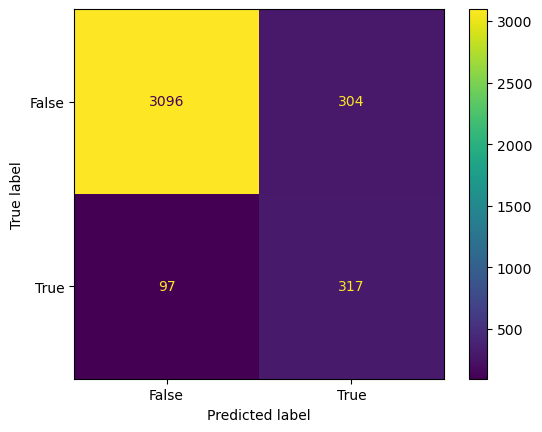

In [68]:
ConfusionMatrixDisplay(confusion_matrix(y, y_hat), display_labels = [False, True]).plot()
plt.show()

In [69]:
y_hat=model.predict_proba(X)[:, 1] >= 0.3

In [70]:
print_performance(y, y_hat)

Accuracy: 0.9116413214472994
Precision: 0.5849889624724062
Recall: 0.6400966183574879
F1: 0.6113033448673588


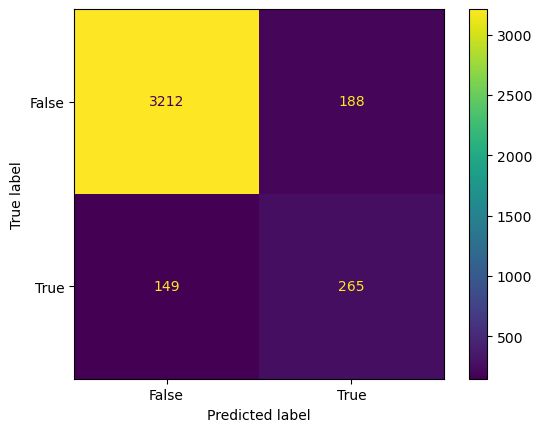

In [71]:
ConfusionMatrixDisplay(confusion_matrix(y, y_hat), display_labels = [False, True]).plot()
plt.show()

In [73]:
y_hat=model.predict_proba(X)[:, 1] >= 0.1
print_performance(y, y_hat)

Accuracy: 0.8434714210802308
Precision: 0.40021810250817885
Recall: 0.8864734299516909
F1: 0.5514650638617581


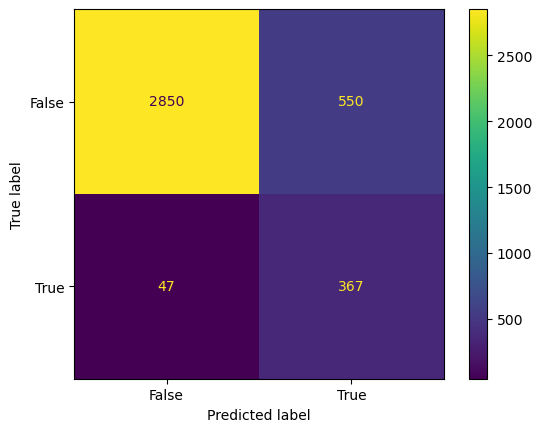

In [74]:
ConfusionMatrixDisplay(confusion_matrix(y, y_hat), display_labels = [False, True]).plot()
plt.show()

In [75]:
from sklearn.metrics import roc_auc_score, roc_curve

In [79]:
y_hat=model.predict_proba(X)[:, 1]
roc_auc_score(y, y_hat)

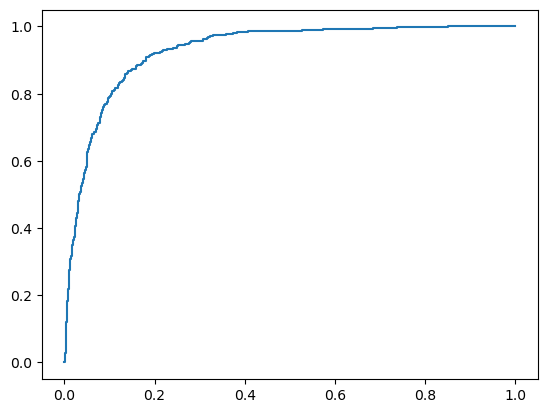

In [81]:
fpr, tpr, thresholds = roc_curve(y, y_hat)
plt.plot(fpr, tpr)
plt.show()

In [85]:
from sklearn.model_selection import cross_val_score
result=cross_val_score(model, X, y, cv=10, scoring='roc_auc')

In [86]:
print(f"AUC: {round(np.mean(result)*100, 2)}% +/- {round(np.std(result)*100, 2)}%")

AUC: 92.5% +/- 2.07%


Za kraj smo vršili promenu granice odluke našeg modela. Spustili smo je prvo na 0.2 a zatim i na 0.1 i 0.3 pošto nam je želja da odziv bude što bolji. Najbolji rezultati su bili na granici 0.2, jer ukoliko smo nastavili da spuštamo granicu, odziv bi rastao ali bi se preciznost i tačnost drastično smanjivale. Zatim smo odlučili da predstavimo ROC krivu i da pomoću metrike AUC (Area under ROC curve) vidimo koliko nam je model dobar. AUC vrednost je bila vrlo visoka pa samim tim možemo da smatramo da je model prema ovom kriterijumu odličan.

## Naivni Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [24]:
model.fit(X,y)

GaussianNB()

In [25]:
print_performance(y, model.predict(X))

Accuracy: 0.8518615626638699
Precision: 0.3857791225416036
Recall: 0.6159420289855072
F1: 0.47441860465116287


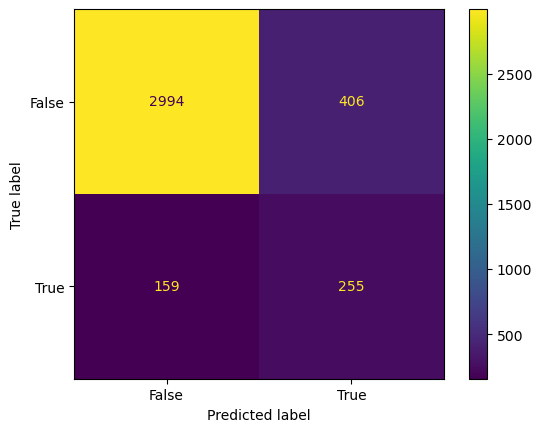

In [26]:
ConfusionMatrixDisplay(confusion_matrix(y, model.predict(X)), display_labels = [False, True]).plot()
plt.show()

Primenom naivnog Bayes-a na originalnom skupu smo postigli ono što smo želeli, a to je viši nivo odziva. Preciznost je mnogo lošija u odnosu na logističku regresiju, ali bismo pre prihvatili ovakav rezultat nego niži nivo odziva.

In [27]:
model.fit(X_train, y_train)

GaussianNB()

In [28]:
print_performance(y_test, model.predict(X_test))

Accuracy: 0.8436681222707424
Precision: 0.35609756097560974
Recall: 0.6083333333333333
F1: 0.44923076923076916


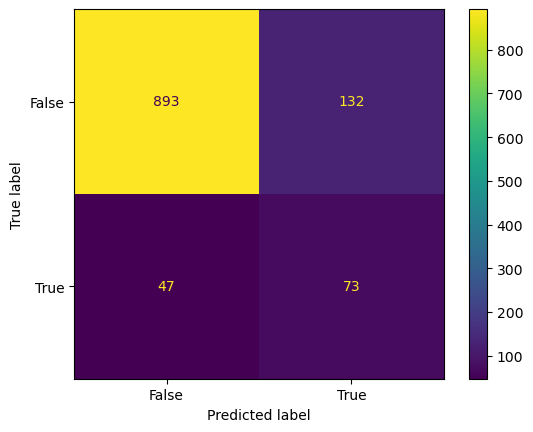

In [29]:
ConfusionMatrixDisplay(confusion_matrix(y_test, model.predict(X_test)), display_labels = [False, True]).plot()
plt.show()

Podelom na train i test skup rezultati koje smo dobili su vrlo malo slabiji nego kod prvog modela.

In [30]:
result=cross_validate(model, X, y, cv=10, scoring=['accuracy', 'precision', 'recall', 'f1'])

In [31]:
print_cv_performance(result)

Accuracy: 85.16% +/- 1.24%
Precision: 38.65% +/- 2.8%
Recall: 61.39% +/- 4.89%
F1: 47.33% +/- 2.72%


Uvođenjem kros-validacije smo dobili, kao i kod logističke regresije, vrlo slične rezultate u odnosu na prethodna dva modela.

Pošto naivni Bayes nema hiperparametre za menjanje, još ćemo samo proveriti njegov AUC skor.

In [89]:
model=GaussianNB().fit(X, y)
y_hat=model.predict_proba(X)[:, 1]
roc_auc_score(y, y_hat)

0.8559775504404661

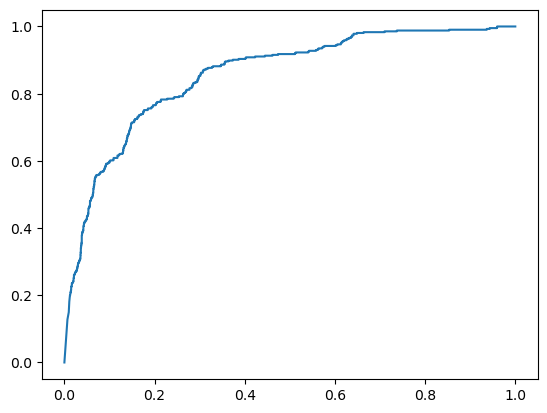

In [90]:
fpr, tpr, thresholds = roc_curve(y, y_hat)
plt.plot(fpr, tpr)
plt.show()

In [91]:
result=cross_val_score(model, X, y, cv=10, scoring='roc_auc')
print(f"AUC: {round(np.mean(result)*100, 2)}% +/- {round(np.std(result)*100, 2)}%")

AUC: 85.28% +/- 3.05%


Kod ovog modela nismo menjali granicu odluke, pošto je on davao niske rezultate preciznosti, a više rezultate odziva, pa samim tim nam nije odgovaralo ni smanjivanje ni povećanje granice odluke. Na osnovu AUC metrike možemo da kažemo da je ovaj model vrlo dobar.

## KNN klasifikacija

In [93]:
from sklearn.neighbors import KNeighborsClassifier
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
model=KNeighborsClassifier()

In [95]:
model.fit(X, y)

KNeighborsClassifier()

In [96]:
print_performance(y, model.predict(X))

Accuracy: 0.9268484530676455
Precision: 0.7051671732522796
Recall: 0.5603864734299517
F1: 0.6244952893674294


D:\Programi\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


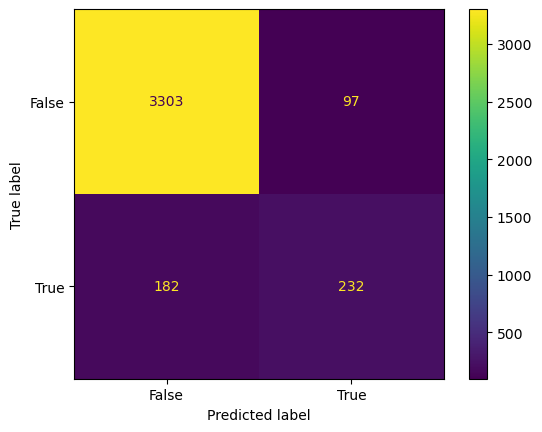

In [35]:
ConfusionMatrixDisplay(confusion_matrix(y, model.predict(X)), display_labels = [False, True]).plot()
plt.show()

Kod modela kNN klasifikacije na originalnom skupu podataka smo dobili vrlo visoke skorove metrika. Preciznost je vrlo visoka, kao i tačnost. Odziv ima nižu vrednost u odnosu na naivni bayes ali nije ni previše loša.

In [36]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
print_performance(y_test, model.predict(X_test))

Accuracy: 0.8943231441048035
Precision: 0.49504950495049505
Recall: 0.4166666666666667
F1: 0.4524886877828054


D:\Programi\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


D:\Programi\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


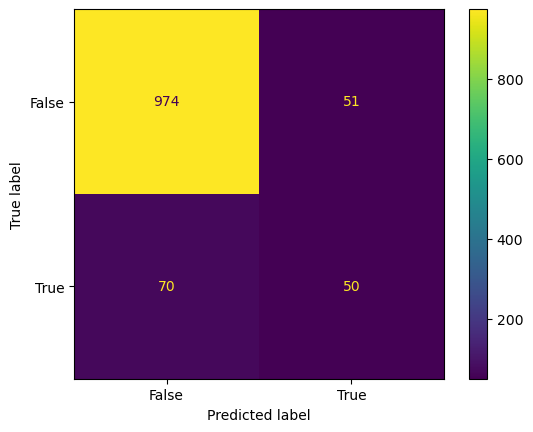

In [38]:
ConfusionMatrixDisplay(confusion_matrix(y_test, model.predict(X_test)), display_labels = [False, True]).plot()
plt.show()

Podelom na train i test podskup, rezultati su se drastišno promenili na gore. Sve metrike su se smanjile, pogotovo preciznost.

In [39]:
result=cross_validate(model, X, y, cv=10, scoring=['accuracy', 'precision', 'recall', 'f1'])

D:\Programi\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Programi\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

In [40]:
print_cv_performance(result)

Accuracy: 89.75% +/- 1.06%
Precision: 54.19% +/- 7.68%
Recall: 41.8% +/- 7.87%
F1: 46.73% +/- 5.78%


Uvođenjem kros-validacije smo dobili rezultate koji pokazuju da je u proseku preciznost viša nego kod train/test podele, ali odziv nam je praktično isti. Kod ovog modela i preciznost i odziv variraju dosta.

In [98]:
for i in range(5, 21):
    print(f'Number of neighbros = {i}')
    model=KNeighborsClassifier(n_neighbors=i)
    result=cross_validate(model, X, y, cv=10, scoring=['accuracy', 'precision', 'recall', 'f1'])
    print_cv_performance(result)
    print('-------------------------------')

Number of neighbros = 5
Accuracy: 89.75% +/- 1.06%
Precision: 54.19% +/- 7.68%
Recall: 41.8% +/- 7.87%
F1: 46.73% +/- 5.78%
-------------------------------
Number of neighbros = 6
Accuracy: 89.98% +/- 0.72%
Precision: 57.21% +/- 6.24%
Recall: 33.8% +/- 7.43%
F1: 41.9% +/- 5.63%
-------------------------------
Number of neighbros = 7
Accuracy: 90.12% +/- 0.87%
Precision: 56.32% +/- 6.29%
Recall: 43.23% +/- 8.29%
F1: 48.38% +/- 5.65%
-------------------------------
Number of neighbros = 8
Accuracy: 90.46% +/- 0.64%
Precision: 60.35% +/- 6.21%
Recall: 36.21% +/- 7.94%
F1: 44.73% +/- 6.35%
-------------------------------
Number of neighbros = 9
Accuracy: 90.09% +/- 0.79%
Precision: 55.69% +/- 5.12%
Recall: 43.46% +/- 9.97%
F1: 48.26% +/- 6.57%
-------------------------------
Number of neighbros = 10
Accuracy: 90.32% +/- 0.48%
Precision: 58.97% +/- 3.35%
Recall: 35.49% +/- 9.27%
F1: 43.72% +/- 6.91%
-------------------------------
Number of neighbros = 11
Accuracy: 90.14% +/- 0.66%
Precisio

Izmenom broja k (broj suseda) smo dobili određena poboljšanja u modelu. Možemo da kažemo da je model imao najbolji odnos odziv/preciznost kada je `k=17`.

In [99]:
model=KNeighborsClassifier(n_neighbors=17).fit(X, y)

In [100]:
y_hat=model.predict_proba(X)[:, 1] >= 0.2

In [101]:
print_performance(y, y_hat)

Accuracy: 0.8888306240167803
Precision: 0.4927536231884058
Recall: 0.821256038647343
F1: 0.6159420289855073


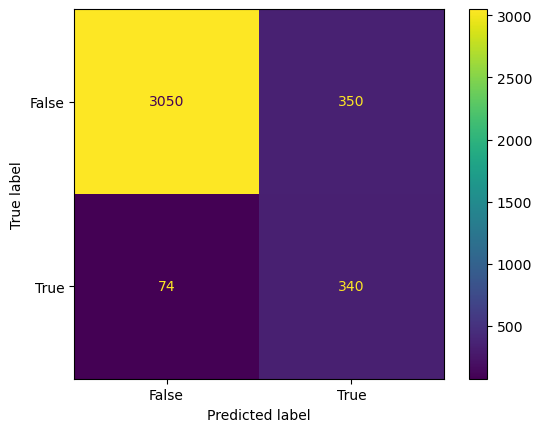

In [102]:
ConfusionMatrixDisplay(confusion_matrix(y, y_hat), display_labels = [False, True]).plot()
plt.show()

In [103]:
y_hat=model.predict_proba(X)[:, 1] >= 0.25

In [104]:
print_performance(y, y_hat)

Accuracy: 0.899580492920818
Precision: 0.5257903494176372
Recall: 0.7632850241545893
F1: 0.6226600985221675


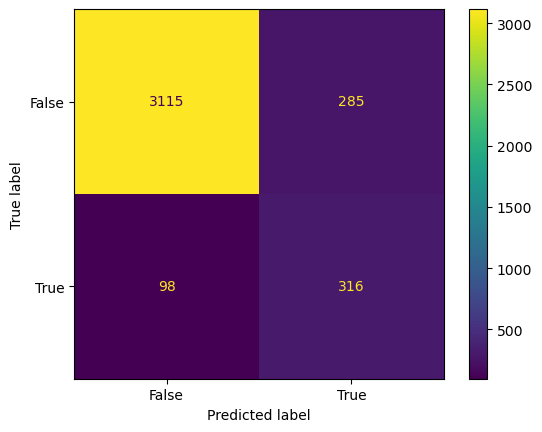

In [105]:
ConfusionMatrixDisplay(confusion_matrix(y, y_hat), display_labels = [False, True]).plot()
plt.show()

Pomeranjem granice odlučivanja na prvo 0.2 a zatim i 0.25 dobili smo mnogo veći odziv i generalno poboljšanje modela. Ipak kada bismo birali granicu uzeli bismo verovatno 0.2 jer se odziv povećava više nego što preciznost otpada.

In [106]:
y_hat=model.predict_proba(X)[:, 1]
roc_auc_score(y, y_hat)

0.9431042199488492

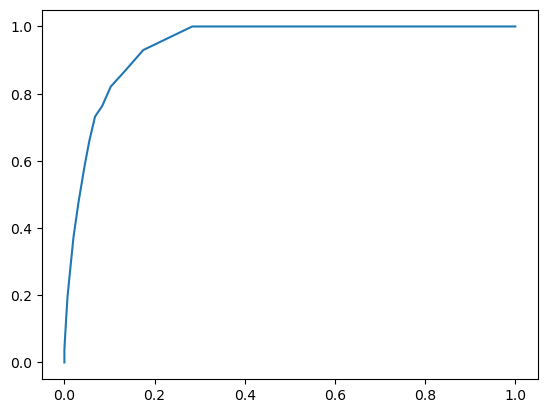

In [107]:
fpr, tpr, thresholds = roc_curve(y, y_hat)
plt.plot(fpr, tpr)
plt.show()

In [108]:
result=cross_val_score(model, X, y, cv=10, scoring='roc_auc')
print(f"AUC: {round(np.mean(result)*100, 2)}% +/- {round(np.std(result)*100, 2)}%")

AUC: 90.32% +/- 2.56%


Korićenjem AUC metrike bez kros-validacije dobijamo da je model najbolji do sada. Uvođenjem kros-validacije AUC vrednost malo opada ali je i dalje preko 90% što znači da je model odličan.

## Stablo odlučivanja

In [41]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [42]:
model.fit(X, y)

DecisionTreeClassifier()

In [43]:
print_performance(y, model.predict(X))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


Stablo odlučivanja nam je dalo perfektne rezultate na osnovnom skupu. Ovo je posledica pretreniranja, jer stablu nismo definisali nikakvo ograničenje.

In [44]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
print_performance(y_test, model.predict(X_test))

Accuracy: 0.874235807860262
Precision: 0.4142857142857143
Recall: 0.48333333333333334
F1: 0.4461538461538461


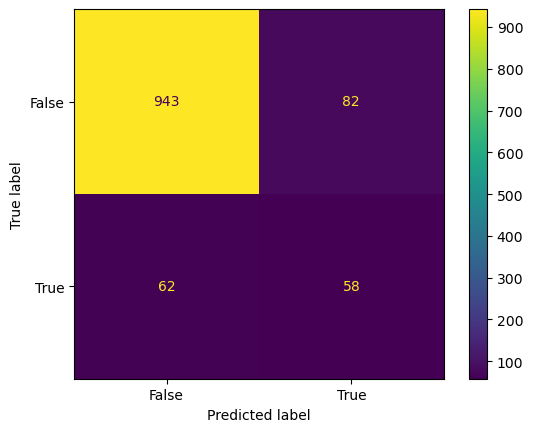

In [46]:
ConfusionMatrixDisplay(confusion_matrix(y_test, model.predict(X_test)), display_labels = [False, True]).plot()
plt.show()

Nakon podele na test i train podskup stablo je dobilo realnije rezultate, koji nisu preterano dobri.

In [47]:
result=cross_validate(model, X, y, cv=10, scoring=['accuracy', 'precision', 'recall', 'f1'])

In [48]:
print_cv_performance(result)

Accuracy: 88.75% +/- 1.38%
Precision: 48.71% +/- 6.28%
Recall: 52.64% +/- 5.44%
F1: 50.45% +/- 5.16%


Uvođenjem kros validacije se u proseku dobijaju bolji rezultati nego podelom na train/test podelu.

In [110]:
for i in [3,4,5,6,7,8,9,10,12,14,16,18,20,22,24,26,28,30]:
    print(f'Max depth {i}')
    model = DecisionTreeClassifier(max_depth=i)
    result=cross_validate(model, X, y, cv=10, scoring=['accuracy', 'precision', 'recall', 'f1'])
    print_cv_performance(result)
    print('-------------------------------')

Max depth 3
Accuracy: 91.32% +/- 1.1%
Precision: 59.87% +/- 4.8%
Recall: 61.88% +/- 7.99%
F1: 60.61% +/- 5.38%
-------------------------------
Max depth 4
Accuracy: 90.33% +/- 1.03%
Precision: 60.72% +/- 10.15%
Recall: 36.43% +/- 8.9%
F1: 44.56% +/- 6.13%
-------------------------------
Max depth 5
Accuracy: 91.19% +/- 1.56%
Precision: 61.04% +/- 7.54%
Recall: 53.7% +/- 12.37%
F1: 56.44% +/- 9.13%
-------------------------------
Max depth 6
Accuracy: 90.25% +/- 1.14%
Precision: 57.42% +/- 8.0%
Recall: 43.94% +/- 7.63%
F1: 49.24% +/- 6.0%
-------------------------------
Max depth 7
Accuracy: 90.4% +/- 0.92%
Precision: 58.4% +/- 7.32%
Recall: 44.19% +/- 7.78%
F1: 49.74% +/- 5.37%
-------------------------------
Max depth 8
Accuracy: 90.43% +/- 0.88%
Precision: 57.03% +/- 4.96%
Recall: 48.78% +/- 5.78%
F1: 52.44% +/- 4.8%
-------------------------------
Max depth 9
Accuracy: 90.3% +/- 1.36%
Precision: 56.12% +/- 7.14%
Recall: 50.5% +/- 8.3%
F1: 52.9% +/- 7.02%
----------------------------

Za parametar koji smo menjali za stablo smo uzeli `max_depth`. Model sa najboljim metrikama je bio model kod koga je `max_depth=3`.

In [111]:
model=DecisionTreeClassifier(max_depth=3).fit(X, y)
y_hat=model.predict_proba(X)[:, 1]
roc_auc_score(y, y_hat)

0.8796881216254618

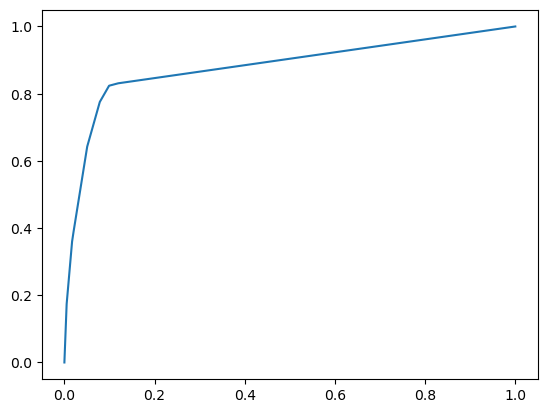

In [112]:
fpr, tpr, thresholds = roc_curve(y, y_hat)
plt.plot(fpr, tpr)
plt.show()

In [113]:
result=cross_val_score(model, X, y, cv=10, scoring='roc_auc')
print(f"AUC: {round(np.mean(result)*100, 2)}% +/- {round(np.std(result)*100, 2)}%")

AUC: 87.94% +/- 3.27%


I kod stabla, kao i kod drugih algoritama, vrednost AUC metrike je vrlo visoka i pokazuje da imamo vrlo dobar model.

# Ansambl algoritmi

Pošto smo dobili dobre rezultate za stablo odlučivanja, odlučili smo da probamo da napravimo modele korišćenjem ansambl algoritama i to random forest i gradient boosting.

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
for i in range(10, 160, 10):
    print(f'Number of trees: {i}')
    model=RandomForestClassifier(max_depth=13, n_estimators=i)
    result=cross_validate(model, X, y, cv=10, scoring=['accuracy', 'precision', 'recall', 'f1'])
    print_cv_performance(result)
    print('-------------------------------')

Number of trees: 10
Accuracy: 90.51% +/- 0.83%
Precision: 60.42% +/- 7.49%
Recall: 39.87% +/- 5.49%
F1: 47.58% +/- 3.92%
-------------------------------
Number of trees: 20
Accuracy: 90.01% +/- 1.22%
Precision: 57.12% +/- 8.95%
Recall: 36.72% +/- 4.94%
F1: 44.4% +/- 5.36%
-------------------------------
Number of trees: 30
Accuracy: 90.74% +/- 0.62%
Precision: 61.58% +/- 4.79%
Recall: 41.06% +/- 5.98%
F1: 48.86% +/- 4.03%
-------------------------------
Number of trees: 40
Accuracy: 90.51% +/- 0.98%
Precision: 60.51% +/- 7.7%
Recall: 38.66% +/- 5.74%
F1: 46.81% +/- 5.24%
-------------------------------
Number of trees: 50
Accuracy: 91.09% +/- 1.1%
Precision: 64.79% +/- 8.64%
Recall: 39.85% +/- 4.81%
F1: 49.27% +/- 5.86%
-------------------------------
Number of trees: 60
Accuracy: 90.59% +/- 0.84%
Precision: 60.53% +/- 5.97%
Recall: 38.65% +/- 5.77%
F1: 46.98% +/- 5.43%
-------------------------------
Number of trees: 70
Accuracy: 90.85% +/- 1.14%
Precision: 63.7% +/- 9.4%
Recall: 38.4

In [127]:
from sklearn.ensemble import GradientBoostingClassifier

In [136]:
model=GradientBoostingClassifier(n_estimators=220, learning_rate=0.6)
result=cross_validate(model, X, y, cv=10, scoring=['accuracy', 'recall', 'f1', 'precision'])
print_cv_performance(result)

Accuracy: 91.06% +/- 1.33%
Precision: 61.06% +/- 8.69%
Recall: 53.84% +/- 8.82%
F1: 56.47% +/- 6.26%


Rezultati nam pokazuju da se ovi modeli nisu nešto pokazali kao dobri klasifikatori za ovaj skup podataka.

In [137]:
#matrica troskova?